## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [7]:
df = pd.read_csv('data/human_body_temperature.csv')

# 1) Is the distribution of body temperatures normal?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

In [8]:
data = pd.DataFrame.from_csv('data/human_body_temperature.csv',index_col=None, 
                            encoding = 'utf-8')

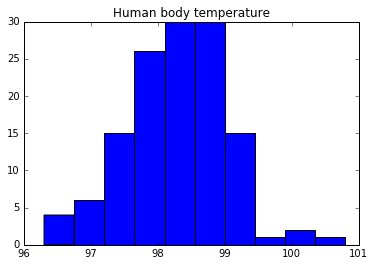

In [44]:
plt.hist(data.temperature,bins = 10)
plt.title("Human body temperature")
plt.show()

In [39]:
mini, maxi = data.temperature.min(), data.temperature.max()
mini, maxi

stats.mstats.zscore([mini,maxi], axis=0, ddof=0)

array([-1.,  1.])

### Distribution appears normal and Z scores of the minimum and maximum are within 3s

# 2) Is the true population mean really 98.6 degrees F?
Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?

A z-test should be used since the sample size is large and s ~= sigma_population

In [61]:
x = data.temperature.mean()
sigma = data.temperature.std()
x, sigma

(98.249230769230749, 0.73318315803894563)

### Null hypothesis: population mean is 98.6 F

### Alternate hypothesis: poulation mean is not 98.6 F

### Alpha level = 0.05/2 (because it's a two tailed test) = 0.025

### Z-score for alpha: if |Z_teststat| > |Z_alpha|, reject null hypothesis. Z_alpha = +- 1.96

In [55]:
sqtn = (len(data.temperature))**0.5
Z = (x - 98.6)/(sigma/sqtn)
Z

-5.4548232923645195

### We reject null hypothesis that population mean is 98.6